   ### Point annotations

In [1]:
%matplotlib inline
from IPython.display import display, Image

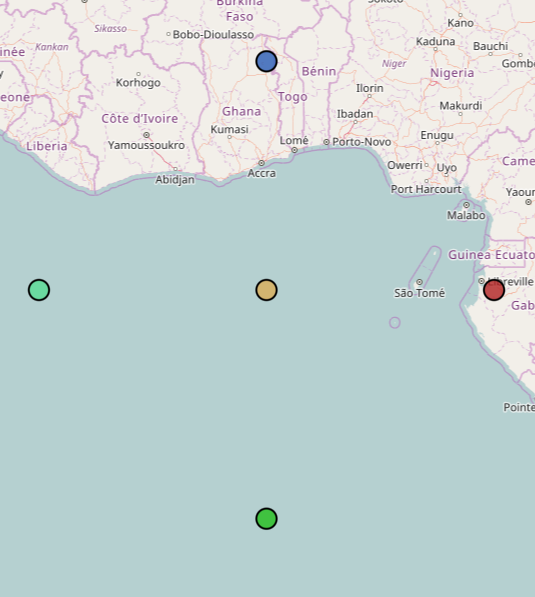

In [2]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589761428d777f07219fcacb/download'

M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

M.add_annotation('point', [0, 0])
M.add_annotation('point', [10, 0], {'rgb': 'firebrick'})
M.add_annotation('point', [-10, 0])
M.add_annotation('point', [0, 10], {'rgb': '#295bb5', 'name': 'spam'})
M.add_annotation('point', [0, -10], {'rgb': '#23be1c', 'name': 'eggs'})

display(Image(EXPECTED, format="png"))

In [ ]:
# test drawing point annotations as svg
M.layers.annotation.points[0]

In [ ]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'] == ([0, 0],)
assert annotations[1]['kwargs']['rgb'] == 'firebrick'
assert annotations[3]['kwargs']['name'] == 'spam'
assert list(M.layers.annotation.points[0].data) == []
annotations

### Rectangle annotations

In [ ]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589765518d777f07219fcace/download'

M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

M.add_annotation('rectangle', [[0, 0], [0, -10], [-10, -10], [-10, 0]])
M.add_annotation('rectangle', [[10, 5], [10, 10], [20, 10], [20, 5]], {'rgb': 'lightgreen'})
M.add_annotation('rectangle', [[10, 0], [15, 0], [15, -15], [10, -15]], {'rgb': 'lightblue', 'name': 'parrot'})

display(Image(EXPECTED, format="png"))

In [ ]:
# test drawing rectangle annotations as svg
M.layers.annotation.rectangles[0]

In [ ]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'][0] == [[0, 0], [0, -10], [-10, -10], [-10, 0]]
assert annotations[1]['kwargs']['rgb'] == 'lightgreen'
assert annotations[2]['kwargs']['name'] == 'parrot'
assert list(M.layers.annotation.rectangles[0].data) == []
annotations

### Polygon annotations

In [ ]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589769ba8d777f07219fcad1/download'

from math import sin, cos, radians
M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

r = 10
def point(angle):
    angle = radians(angle)
    return [r * cos(angle), r * sin(angle)]

M.add_annotation('polygon', [
    point(60 * i) for i in range(6)
], {'rgb': 'red', 'name': 'stop'})

display(Image(EXPECTED, format="png"))

In [ ]:
# test drawing polygon annotations as svg
M.layers.annotation.polygons[0]

In [ ]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'][0][0] == [10.0, 0.0]
assert annotations[0]['kwargs']['rgb'] == 'red'
assert annotations[0]['kwargs']['name'] == 'stop'
assert list(M.layers.annotation.polygons[0].data) == []
annotations